In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from xgcm import Grid
import sys
sys.path.append('../src/training-on-CM2.6/')
from helpers.selectors import *

import warnings
import logging

# Ignore all warnings
warnings.filterwarnings("ignore")

# Suppress numpy floating warnings (np is already imported in the notebook)
try:
    np.seterr(all="ignore")
except NameError:
    pass

# Reduce logging noise
logging.getLogger().setLevel(logging.ERROR)

In [2]:
data_dir = '/vast/db194/CM26_datasets/ocean3d/subfilter/FGR3/factor-'
factors = [4, 9 , 12, 15]

In [4]:
exp_dir = data_dir + str(factors[2])
ds = xr.open_dataset(exp_dir + '/validate-0.nc')
ds_perm = xr.open_dataset(exp_dir + '/permanent_features.nc')
ds_param = xr.open_dataset(exp_dir + '/param.nc')

In [5]:
ds

<xarray.Dataset> Size: 514MB
Dimensions:              (zl: 50, yh: 225, xq: 300, yq: 225, xh: 300)
Coordinates:
  * yh                   (yh) float64 2kB -80.88 -80.37 -79.86 ... 89.24 89.75
  * xq                   (xq) float64 2kB -278.8 -277.6 -276.4 ... 78.8 80.0
  * zl                   (zl) float64 400B 5.034 15.1 ... 5.185e+03 5.395e+03
    time                 object 8B ...
  * xh                   (xh) float64 2kB -279.4 -278.2 -277.0 ... 78.2 79.4
  * yq                   (yq) float64 2kB -80.62 -80.12 -79.61 ... 89.49 90.0
Data variables: (12/42)
    u                    (zl, yh, xq) float32 14MB ...
    v                    (zl, yq, xh) float32 14MB ...
    rho                  (zl, yh, xh) float32 14MB ...
    SGSx                 (zl, yh, xq) float32 14MB ...
    SGSy                 (zl, yq, xh) float32 14MB ...
    Txx                  (zl, yh, xh) float32 14MB ...
    ...                   ...
    dvdz_geo             (zl, yh, xh) float32 14MB ...
    rhox                 (zl, yh, xh) float32 14MB ...
    rhoy                 (zl, yh, xh) float32 14MB ...
    dudz_mag             (zl, yh, xh) float32 14MB ...
    dudz_geo_mag         (zl, yh, xh) float32 14MB ...
    rho_grad_mag         (zl, yh, xh) float32 14MB ...

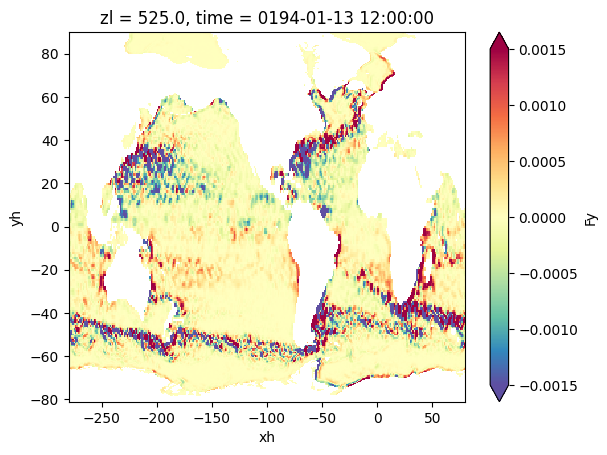

In [6]:
ds.Fy.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)


In [7]:
diss = (ds.Fx*ds.rhox + ds.Fy*ds.rhoy) / ds.rho_grad_mag

In [8]:
N2 = ds.N_buoyancy**2


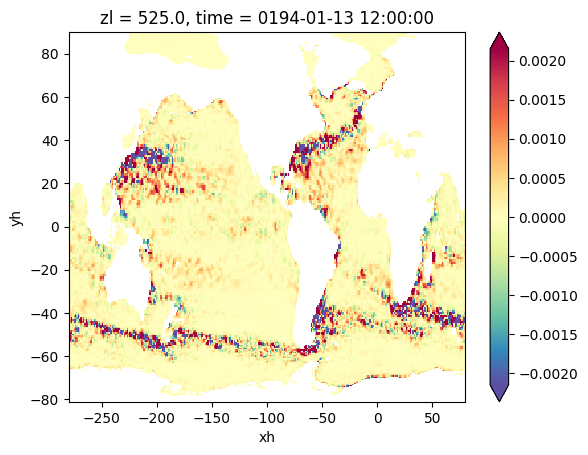

In [9]:
diss.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', robust=True)

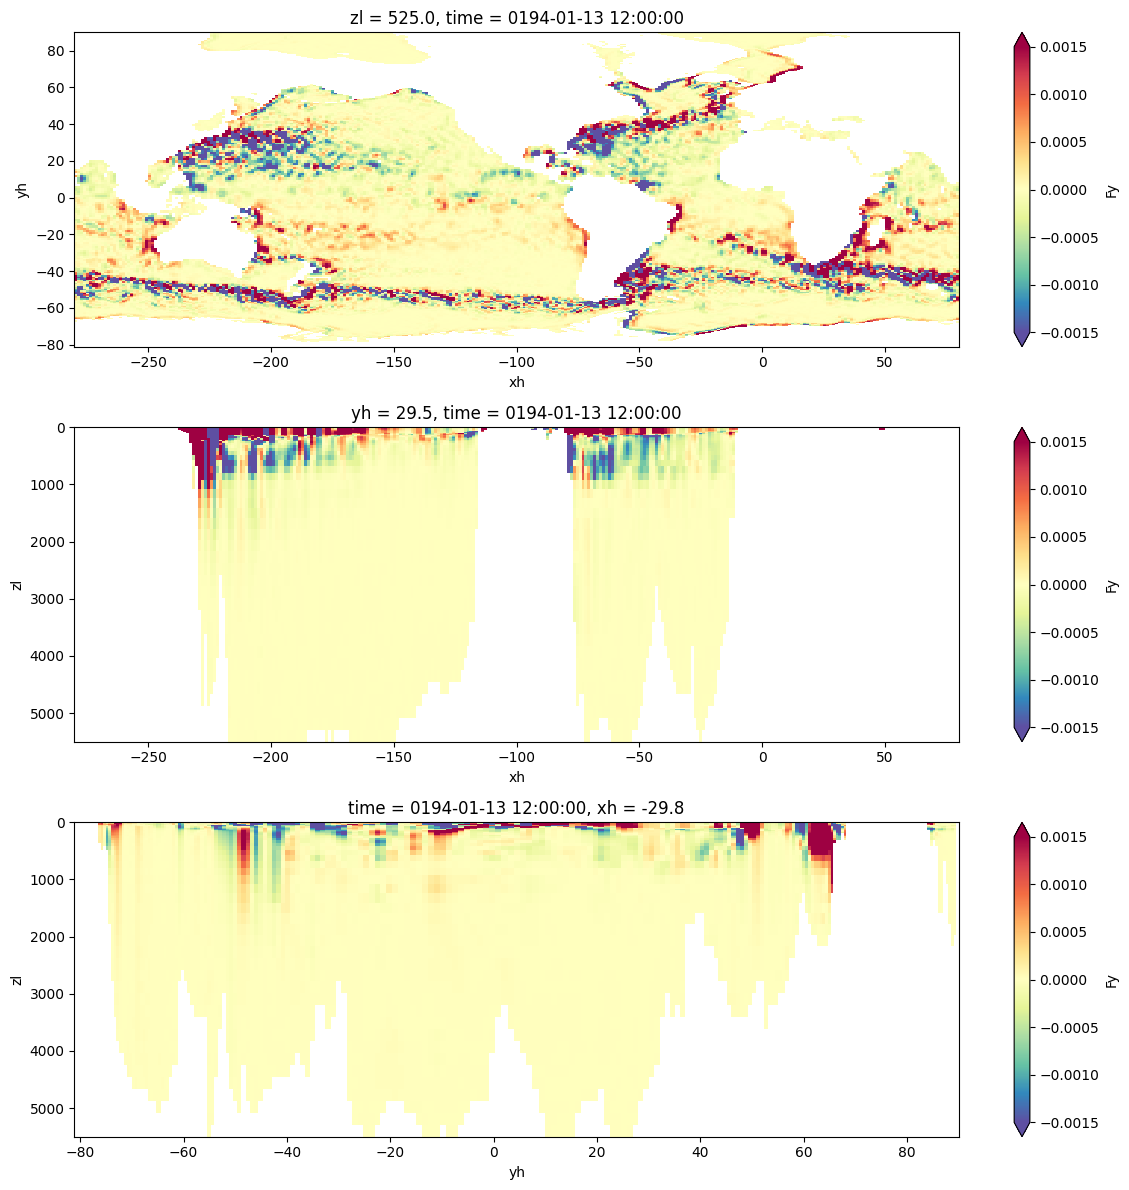

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ds.Fy.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
ds.Fy.where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
ds.Fy.where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', vmin=-0.0015, robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

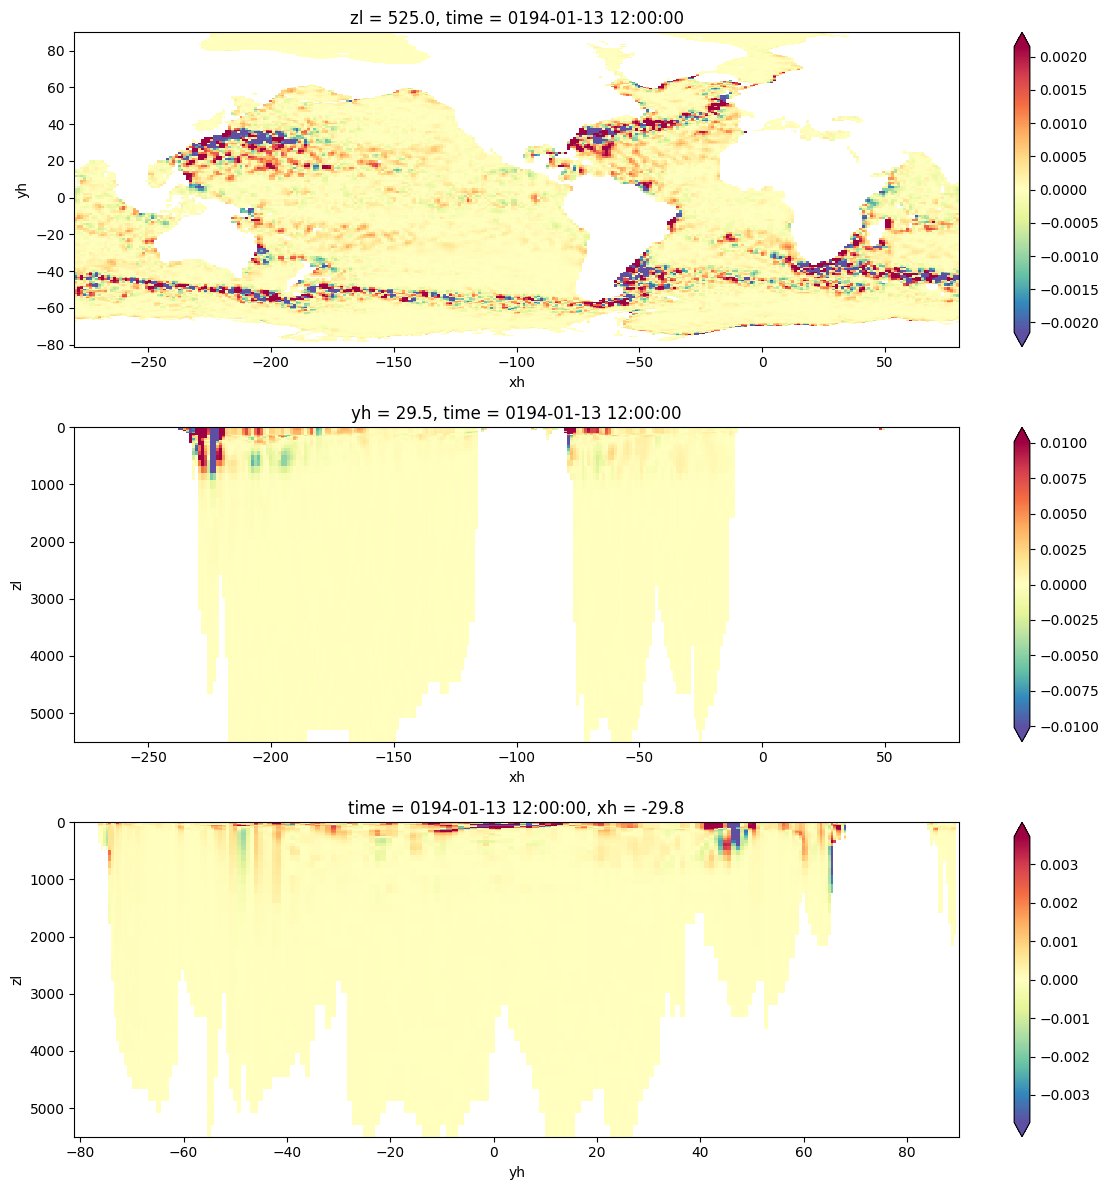

In [11]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
diss.where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
diss.where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r',  robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
diss.where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

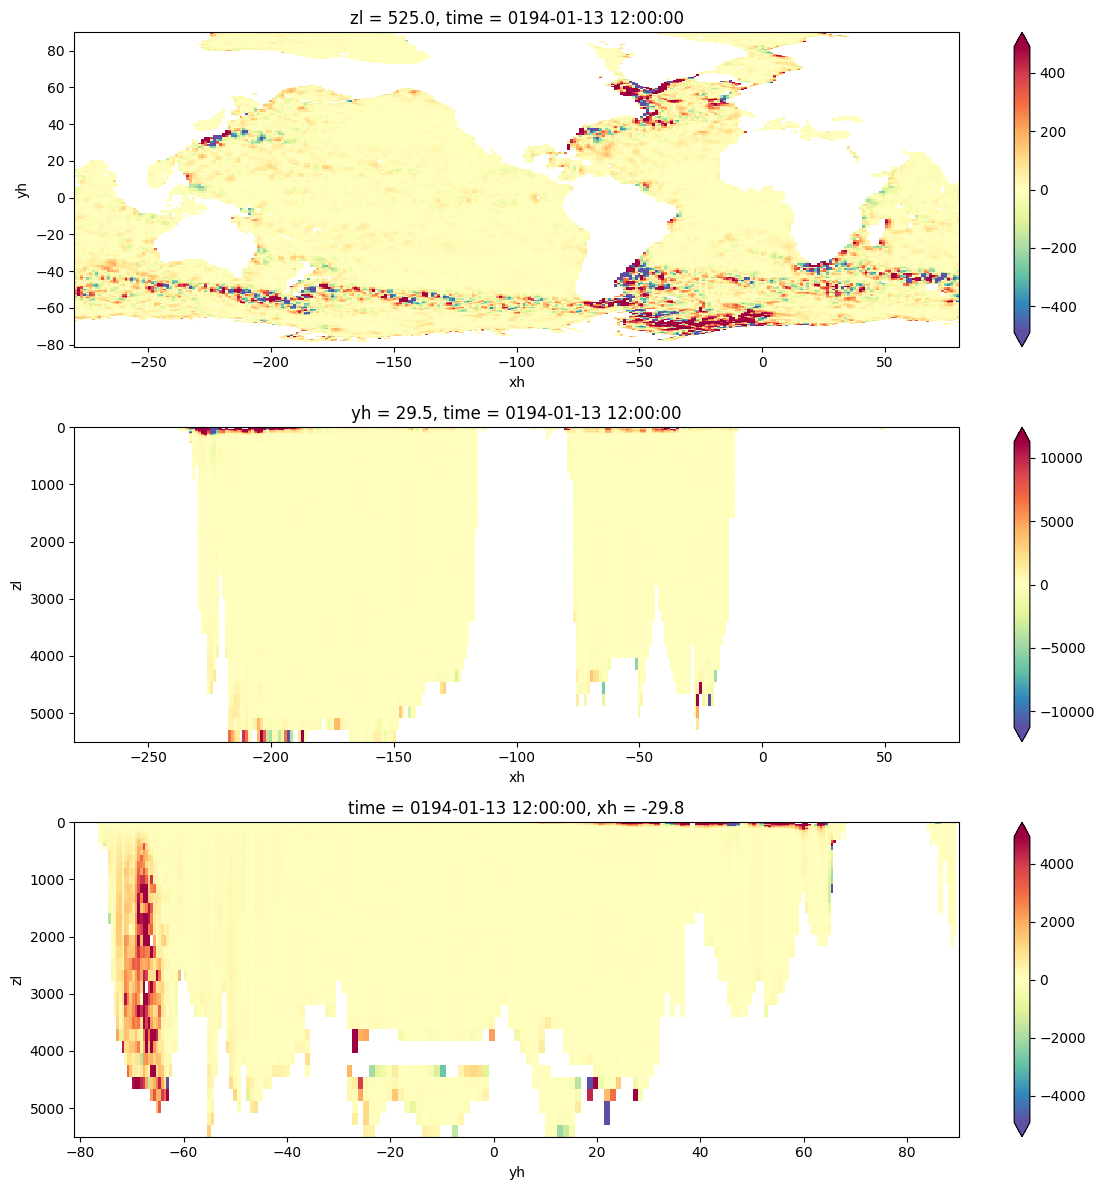

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
(diss/N2).where(ds_param.wet).sel(zl=500, method='nearest').plot(cmap='Spectral_r', robust=True)
#plt.gca().invert_yaxis()

plt.subplot(3,1,2)
(diss/N2).where(ds_param.wet).sel(yh=30, method='nearest').plot(cmap='Spectral_r',  robust=True)
plt.gca().invert_yaxis()

plt.subplot(3,1,3)
(diss/N2).where(ds_param.wet).sel(xh=-30, method='nearest').plot(cmap='Spectral_r', robust=True)
plt.gca().invert_yaxis()

plt.tight_layout()

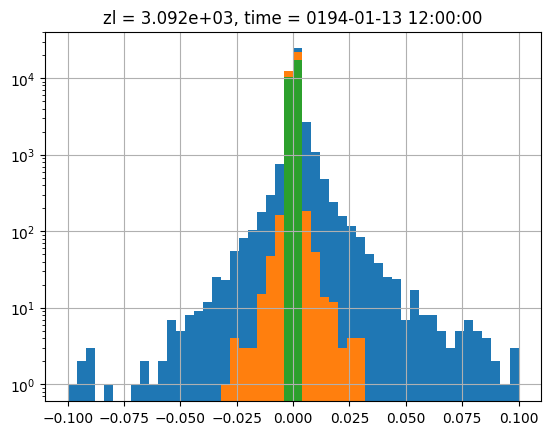

In [13]:
diss.where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-0.1,0.1,51))
diss.where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-0.1,0.1,51))
diss.where(ds_param.wet).sel(zl=3000, method='nearest').plot.hist(bins=np.linspace(-0.1,0.1,51))
plt.yscale('log')
plt.grid()

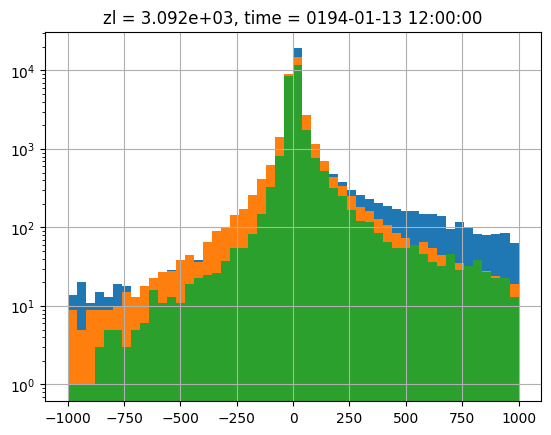

In [14]:

(diss/N2).where(ds_param.wet).sel(zl=50, method='nearest').plot.hist(bins=np.linspace(-1000,1000,51))
(diss/N2).where(ds_param.wet).sel(zl=500, method='nearest').plot.hist(bins=np.linspace(-1000,1000,51))
(diss/N2).where(ds_param.wet).sel(zl=3000, method='nearest').plot.hist(bins=np.linspace(-1000,1000,51))
plt.yscale('log')
plt.grid()